In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("..//Data//Ad_purchace.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

In [4]:
df=df.drop(columns="User ID")

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [7]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
x=df.drop(columns="Purchased")
y=df["Purchased"]

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=(0.2),random_state=0)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,weights="uniform",metric="euclidean")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

accuracy_score is : 0.825
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.68      0.68      0.68        22

    accuracy                           0.82        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.82      0.82      0.82        80



<AxesSubplot:>

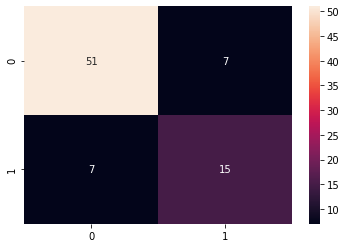

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy_score is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [18]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()
s_xtrain=sc.fit_transform(xtrain)
s_xtest=sc.fit_transform(xtest)

model=KNeighborsClassifier(n_neighbors=5,weights="uniform",metric="euclidean")
model.fit(s_xtrain,ytrain)
s_ypred=model.predict(s_xtest)

accuracy_score is : 0.925
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.81      0.95      0.88        22

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80



<AxesSubplot:>

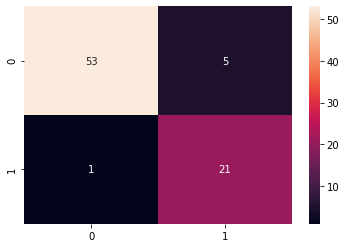

In [29]:
print("accuracy_score is :",accuracy_score(ytest,s_ypred))
print(classification_report(ytest,s_ypred))
cm=confusion_matrix(ytest,s_ypred)
sns.heatmap(cm,annot=True)